In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
# Nhập các thư viện cần thiết
import matplotlib.pyplot as plt  # Matplotlib để vẽ đồ thị cơ bản
import seaborn as sns  # Seaborn để trực quan hóa dữ liệu thống kê
import pandas as pd  # Pandas để thực hiện các thao tác xử lý và phân tích dữ liệu
import plotly.express as px  # Plotly Express để tạo đồ thị tương tác
from bokeh.plotting import figure, show  # Bokeh để vẽ đồ thị tương tác
import altair as alt  # Altair để trực quan hóa thống kê theo cách khai báo
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_palette("viridis")
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler để chuẩn hóa dữ liệu về khoảng [0, 1]
from sklearn.preprocessing import LabelEncoder  # LabelEncoder để mã hóa biến đối số
from sklearn.model_selection import train_test_split  # train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm thử

# Nhập các mô hình học máy
from sklearn.linear_model import LinearRegression  # Mô hình hồi quy tuyến tính
from sklearn.tree import DecisionTreeRegressor  # Mô hình hồi quy cây quyết định
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor  # Mô hình hồi quy RandomForest và Bagging
from sklearn import metrics  # Thư viện đánh giá hiệu suất mô hình
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Tắt cả các cảnh báo để giữ mã nguồn sạch sẽ và tránh hiển thị cảnh báo không cần thiết
import warnings
warnings.filterwarnings('ignore')

In [4]:
flights = pd.read_csv('/content/gdrive/MyDrive/HMTK_O13_Lý thuyết/Flight_Price_Prediction/Dataset/Clean_Dataset.csv')
business = pd.read_csv('/content/gdrive/MyDrive/HMTK_O13_Lý thuyết/Flight_Price_Prediction/Dataset/business.csv')
economy = pd.read_csv('/content/gdrive/MyDrive/HMTK_O13_Lý thuyết/Flight_Price_Prediction/Dataset/economy.csv')

In [5]:
df = flights['class'].value_counts()

In [6]:
print(df)

Economy     206666
Business     93487
Name: class, dtype: int64


In [7]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [8]:
flights.head(20) # Lấy 20 data đầu tiên để xem

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [9]:
flights.keys() # Các khóa trong bảng data

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

## **Dataset Features**

1. <font color='blue'><b>Airline:</b></font>
   - The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2. <font color='blue'><b>Flight:</b></font>
   - Flight stores information regarding the plane's flight code. It is a categorical feature.

3. <font color='blue'><b>Source City:</b></font>
   - City from which the flight takes off. It is a categorical feature having 6 unique cities.

4. <font color='blue'><b>Departure Time:</b></font>
   - This is a derived categorical feature obtained by grouping time periods into bins. It stores information about the departure time and has 6 unique time labels.

5. <font color='blue'><b>Stops:</b></font>
   - A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6. <font color='blue'><b>Arrival Time:</b></font>
   - This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7. <font color='blue'><b>Destination City:</b></font>
   - City where the flight will land. It is a categorical feature having 6 unique cities.

8. <font color='blue'><b>Class:</b></font>
   - A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9. <font color='blue'><b>Duration:</b></font>
   - A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10. <font color='blue'><b>Days Left:</b></font>
    - This is a derived characteristic that is calculated by subtracting the trip date from the booking date.

11. <font color='blue'><b>Price:</b></font>
    - Target variable stores information on the ticket price.

---

*Note: ===================To boost learning, try to create an end-to-end project using the dataset.==================================


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [11]:
flights = flights.drop('Unnamed: 0', axis = 1) # Xóa cột stt bị lặp lại

In [12]:
# Creating a Back up File
flights_bk=flights.copy()

In [13]:
flights.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## **Nhận xét tổng quan**

1. <font color='red'><b>Thời lượng Chuyến Bay (duration):</b></font>
   - Thời lượng trung bình của chuyến bay là khoảng 12.22 giờ, với độ lệch chuẩn là khoảng 7.19 giờ.
   - Thời lượng ngắn nhất của chuyến bay là 0.83 giờ, còn thời lượng dài nhất là 49.83 giờ.

2. <font color='red'><b>Số Ngày Còn Lại (days_left):</b></font>
   - Số ngày còn lại trung bình là khoảng 26 ngày, với độ lệch chuẩn là khoảng 13.56 ngày.
   - Số ngày còn lại ít nhất là 1 ngày, và nhiều nhất là 49 ngày.

3. <font color='red'><b>Giá (price):</b></font>
   - Giá trung bình của các chuyến bay là khoảng 20,889.66 đơn vị.
   - Giá thấp nhất là 1,105 đơn vị, trong khi giá cao nhất là 123,071 đơn vị.
   - Dữ liệu có vẻ phân tán lớn, do độ lệch chuẩn cao (khoảng 22,697.77 đơn vị).
:
4. <font color='red'><b>Phân vị (Percentiles):</b></font>
   - Phân vị 25% (Q1) của thời lượng, số ngày còn lại và giá là 6.83 giờ, 15 ngày và 4,783 đơn vị, tương ứng.
   - Phân vị 50% (Q2 hoặc trung vị) là 11.25 giờ, 26 ngày và 7,425 đơn vị.
   - Phân vị 75% (Q3) là 16.17 giờ, 38 ngày và 42,521 đơn vị.

5. <font color='red'><b>Phân bố:</b></font>
   - Dữ liệu thời lượng chuyến bay có vẻ phân bố đều, có sự biến động lớn.
   - Dữ liệu số ngày còn lại và giá có phân bố phân tán cao, với giá có dấu hiệu của việc có một số giá trị cao hơn so với giá trung bình.

---

In [14]:
flights.duplicated().sum() # Đếm số lượng các dòng trùng lặp trong DataFrame 'flights'

0

In [15]:
pd.DataFrame({"Missing values (%)" : round(flights.isnull().sum()/len(flights), 2)})

# Tạo DataFrame có cột "Missing values (%)" chứa thông tin về tỷ lệ giá trị thiếu trong mỗi cột của 'flights'

,Missing values (%)
airline,0.0
flight,0.0
source_city,0.0
departure_time,0.0
stops,0.0
arrival_time,0.0
destination_city,0.0
class,0.0
duration,0.0
days_left,0.0


In [16]:
for i in flights:
    print(i)  # In tên của từng cột
    print(flights[i].unique(), "\n")  # In các giá trị duy nhất của từng cột


airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] 

flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] 

source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 

departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 

stops
['zero' 'one' 'two_or_more'] 

arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] 

destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] 

class
['Economy' 'Business'] 

duration
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.

## **Phân tích các biến độc lập**

In [17]:
# Tính số lần xuất hiện của mỗi hãng hàng không trong cột 'airline'
counts = flights['airline'].value_counts()
# Sắp xếp các hãng hàng không theo số lần xuất hiện giảm dần và chuyển thành danh sách
sorted_airlines = counts.sort_values(ascending=False).index.tolist()
# Tạo biểu đồ histogram
fig = px.histogram(flights, x='airline', color='airline', color_discrete_sequence=px.colors.sequential.Viridis, category_orders={"airline": sorted_airlines})
# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Count of different Airlines', xaxis_title='Airlines', yaxis_title='Count')
# Hiển thị biểu đồ
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Tính số lần xuất hiện của mỗi chuyến bay trong cột 'flight' và chọn 10 chuyến bay có số lần xuất hiện cao nhất
counts = flights['flight'].value_counts().nlargest(10)
# Chọn ra top10 chuyến máy có số lượng đi cao nhất
top_flights = flights[flights['flight'].isin(counts.index)]
# Sắp xếp các chuyến bay theo số lần xuất hiện giảm dần và chuyển thành danh sách
sorted_flights = top_flights['flight'].value_counts().sort_values(ascending=False).index.tolist()
# Tạo biểu đồ histogram
fig = px.histogram(top_flights, x='flight', color='flight', color_discrete_sequence=px.colors.sequential.Viridis, category_orders={"flight": sorted_flights})
# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Count of top 10 flights', xaxis_title='Flight', yaxis_title='Count')
# Hiển thị biểu đồ
fig.show()


In [19]:
# Tính số lần xuất hiện của mỗi thành phố nguồn trong cột 'source_city'
counts = flights['source_city'].value_counts()

# Sắp xếp các thành phố nguồn theo số lần xuất hiện giảm dần và chuyển thành danh sách
sorted_source_city = counts.sort_values(ascending=False).index.tolist()

# Tạo biểu đồ histogram u
fig = px.histogram(flights, x='source_city', color='source_city', color_discrete_sequence=px.colors.sequential.Viridis, category_orders={"source_city": sorted_source_city})

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Count of Source City', xaxis_title='Source City', yaxis_title='Count')

# Hiển thị biểu đồ
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [20]:
# Tính số lần xuất hiện của mỗi thành phố đích trong cột 'destination_city'
counts = flights['destination_city'].value_counts()

# Sắp xếp các thành phố đích theo số lần xuất hiện giảm dần và chuyển thành danh sách
sorted_destination_city = counts.sort_values(ascending=False).index.tolist()

# Tạo biểu đồ histogram
fig = px.histogram(
    flights,  # DataFrame 'flights' chứa dữ liệu
    x='destination_city',  # Cột 'destination_city' được sử dụng làm trục x
    color='destination_city',  # Màu sắc của các thanh histogram phụ thuộc vào giá trị trong cột 'destination_city'
    color_discrete_sequence=px.colors.sequential.Viridis,  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng 'destination_city'
    category_orders={"destination_city": sorted_destination_city}  # Sắp xếp các thành phố đích theo thứ tự đã được xác định trước
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Count of Destination City', xaxis_title='Destination City', yaxis_title='Count')

# Hiển thị biểu đồ
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [21]:
# Tính số lần xuất hiện của mỗi loại hạng ghế trong cột 'class'
counts = flights['class'].value_counts()

# Sắp xếp các loại hạng ghế theo số lần xuất hiện giảm dần và chuyển thành danh sách
sorted_class = counts.sort_values(ascending=False).index.tolist()

# Tạo biểu đồ histogram
fig = px.histogram(
    flights,  # DataFrame 'flights' chứa dữ liệu
    x='class',  # Cột 'class' được sử dụng làm trục x
    color='class',  # Màu sắc của các thanh histogram phụ thuộc vào giá trị trong cột 'class'
    color_discrete_sequence=px.colors.sequential.Viridis,  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng 'class'
    category_orders={"class": sorted_class}  # Sắp xếp các loại hạng ghế theo thứ tự đã được xác định trước
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Count of Class', xaxis_title='Class', yaxis_title='Count')

# Hiển thị biểu đồ
fig.show()


Output hidden; open in https://colab.research.google.com to view.

## **<font color='blue'>Thông tin chi tiết<font>**

1. <font color='white'>Trong số tất cả các hãng hàng không trong tập dữ liệu, Vistara có số lượng chuyến bay cao nhất, trong khi SpiceJet có số chuyến bay thấp nhất</font>

2. <font color='white'>UK-706 là chuyến bay được bay thường xuyên nhất trong số 10 chuyến bay hàng đầu, trong khi UK-860 là chuyến bay ít nhất.</font>

3. <font color='white'>Delhi là thành phố có nguồn chuyến bay phổ biến nhất, trong khi Chennai là thành phố ít phổ biến nhất.</font>

4. <font color='white'>Mumbai là thành phố được các chuyến bay ưa chuộng nhất, trong khi Chennai là thành phố ít được ưa chuộng nhất.</font>

4. <font color='white'>Hạng phổ thông là hạng du lịch được ưa thích nhất, trong đó hạng Thương gia ít phổ biến hơn.</font>

---

## **Phân tích theo thời lượng (duration)**

Thời gian trung bình của mỗi hãng hàng không

In [22]:
# Nhóm dữ liệu theo từng hãng hàng không và tính giá trị trung bình của thời lượng chuyến bay
airline_duration = flights.groupby('airline')['duration'].mean().sort_values(ascending=False).reset_index()

# Tạo biểu đồ cột sử dụng
fig = px.bar(
    airline_duration,  # DataFrame chứa thông tin giá trị trung bình thời lượng của từng hãng hàng không
    x='airline',  # Cột 'airline' được sử dụng làm trục x
    y='duration',  # Cột 'duration' được sử dụng làm trục y
    color='airline',  # Màu sắc của các cột phụ thuộc vào giá trị trong cột 'airline'
    color_discrete_sequence=px.colors.sequential.Viridis  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng hãng hàng không
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Avg Duration of Each Airline', xaxis_title='Airline', yaxis_title='Duration')

# Hiển thị biểu đồ
fig.show()


Thời gian trung bình của mỗi thành phố điểm đi

In [23]:
# Nhóm dữ liệu theo từng thành phố nguồn và tính giá trị trung bình của thời lượng chuyến bay
source_city_duration = flights.groupby('source_city')['duration'].mean().sort_values(ascending=False).reset_index()

# Tạo biểu đồ cột sử
fig = px.bar(
    source_city_duration,  # DataFrame chứa thông tin giá trị trung bình thời lượng của từng thành phố nguồn
    x='source_city',  # Cột 'source_city' được sử dụng làm trục x
    y='duration',  # Cột 'duration' được sử dụng làm trục y
    color='source_city',  # Màu sắc của các cột phụ thuộc vào giá trị trong cột 'source_city'
    color_discrete_sequence=px.colors.sequential.Viridis  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng thành phố nguồn
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Avg Duration of Each Source City', xaxis_title='Source City', yaxis_title='Duration')

# Hiển thị biểu đồ
fig.show()


Thời gian trung bình của mỗi thành phố điểm đến:

In [24]:
# Nhóm dữ liệu theo từng thành phố đích và tính giá trị trung bình của thời lượng chuyến bay
destination_city_duration = flights.groupby('destination_city')['duration'].mean().sort_values(ascending=False).reset_index()

# Tạo biểu đồ cột
fig = px.bar(
    destination_city_duration,  # DataFrame chứa thông tin giá trị trung bình thời lượng của từng thành phố đích
    x='destination_city',  # Cột 'destination_city' được sử dụng làm trục x
    y='duration',  # Cột 'duration' được sử dụng làm trục y
    color='destination_city',  # Màu sắc của các cột phụ thuộc vào giá trị trong cột 'destination_city'
    color_discrete_sequence=px.colors.sequential.Viridis  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng thành phố đích
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Avg Duration of Each Destination City', xaxis_title='Destination City', yaxis_title='Duration')

# Hiển thị biểu đồ
fig.show()


Thời gian trung bình của mỗi lần đến

In [25]:
# Nhóm dữ liệu theo thời gian đến (arrival_time) và tính giá trị trung bình của thời lượng chuyến bay
arrival_time_duration = flights.groupby('arrival_time')['duration'].mean().sort_values(ascending=False).reset_index()

# Tạo biểu đồ cột
fig = px.bar(
    arrival_time_duration,  # DataFrame chứa thông tin giá trị trung bình thời lượng của từng thời gian đến
    x='arrival_time',  # Cột 'arrival_time' được sử dụng làm trục x
    y='duration',  # Cột 'duration' được sử dụng làm trục y
    color='arrival_time',  # Màu sắc của các cột phụ thuộc vào giá trị trong cột 'arrival_time'
    color_discrete_sequence=px.colors.sequential.Viridis  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng thời gian đến
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Avg Duration of Each Arrival Time', xaxis_title='Arrival Time', yaxis_title='Duration')

# Hiển thị biểu đồ
fig.show()


In [26]:
# Nhóm dữ liệu theo thời gian xuất phát (departure_time) và tính giá trị trung bình của thời lượng chuyến bay
departure_time_duration = flights.groupby('departure_time')['duration'].mean().sort_values(ascending=False).reset_index()

# Tạo biểu đồ cột sử
fig = px.bar(
    departure_time_duration,  # DataFrame chứa thông tin giá trị trung bình thời lượng của từng thời gian xuất phát
    x='departure_time',  # Cột 'departure_time' được sử dụng làm trục x
    y='duration',  # Cột 'duration' được sử dụng làm trục y
    color='departure_time',  # Màu sắc của các cột phụ thuộc vào giá trị trong cột 'departure_time'
    color_discrete_sequence=px.colors.sequential.Viridis  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng thời gian xuất phát
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Avg Duration of Each Departure Time', xaxis_title='Departure Time', yaxis_title='Duration')

# Hiển thị biểu đồ
fig.show()


Thời gian trung bình của mỗi điểm dừng

In [27]:
# Nhóm dữ liệu theo số lượng điểm dừng (stops) và tính giá trị trung bình của thời lượng chuyến bay
stops_duration = flights.groupby('stops')['duration'].mean().sort_values(ascending=False).reset_index()

# Tạo biểu đồ cột
fig = px.bar(
    stops_duration,  # DataFrame chứa thông tin giá trị trung bình thời lượng của từng số lượng điểm dừng
    x='stops',  # Cột 'stops' được sử dụng làm trục x
    y='duration',  # Cột 'duration' được sử dụng làm trục y
    color='stops',  # Màu sắc của các cột phụ thuộc vào giá trị trong cột 'stops'
    color_discrete_sequence=px.colors.sequential.Viridis  # Sử dụng một chuỗi màu từ Viridis để tô màu cho từng số lượng điểm dừng
)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Avg Duration of Each Stop', xaxis_title='Stop', yaxis_title='Duration')

# Hiển thị biểu đồ
fig.show()


## **<font color='blue'>Thông tin chi tiết<font>**

1. <font color='white'>Air India có thời gian bay trung bình cao nhất trong số tất cả các hãng hàng không trong tập dữ liệu, trong khi Indigo có thời gian bay thấp nhất.</font>

2. <font color='white'>Các chuyến bay không có điểm dừng có thời lượng trung bình ngắn nhất, trong khi các chuyến bay có 2 điểm dừng trở lên có thời lượng trung bình dài nhất.</font>

3. <font color='white'>Thời gian đến vào buổi sáng có thời gian bay trung bình cao nhất, trong khi thời gian đến vào đêm muộn có thời gian bay thấp nhất. Thời gian khởi hành ban đêm có thời gian trung bình cao nhất, trong khi đêm khuya có thời gian thấp nhất.</font>

4. <font color='white'>Hyderabad có thời gian bay trung bình dài nhất với tư cách là thành phố điểm đến, trong khi Kolkata có thời gian bay trung bình dài nhất với tư cách là thành phố nguồn. Delhi có thời gian trung bình ngắn nhất cho cả thành phố đích và thành phố nguồn.</font>


---

## **<font color='white'>Phân tích theo số ngày còn lại<font>**


Giá thay đổi thế nào theo số ngày còn lại

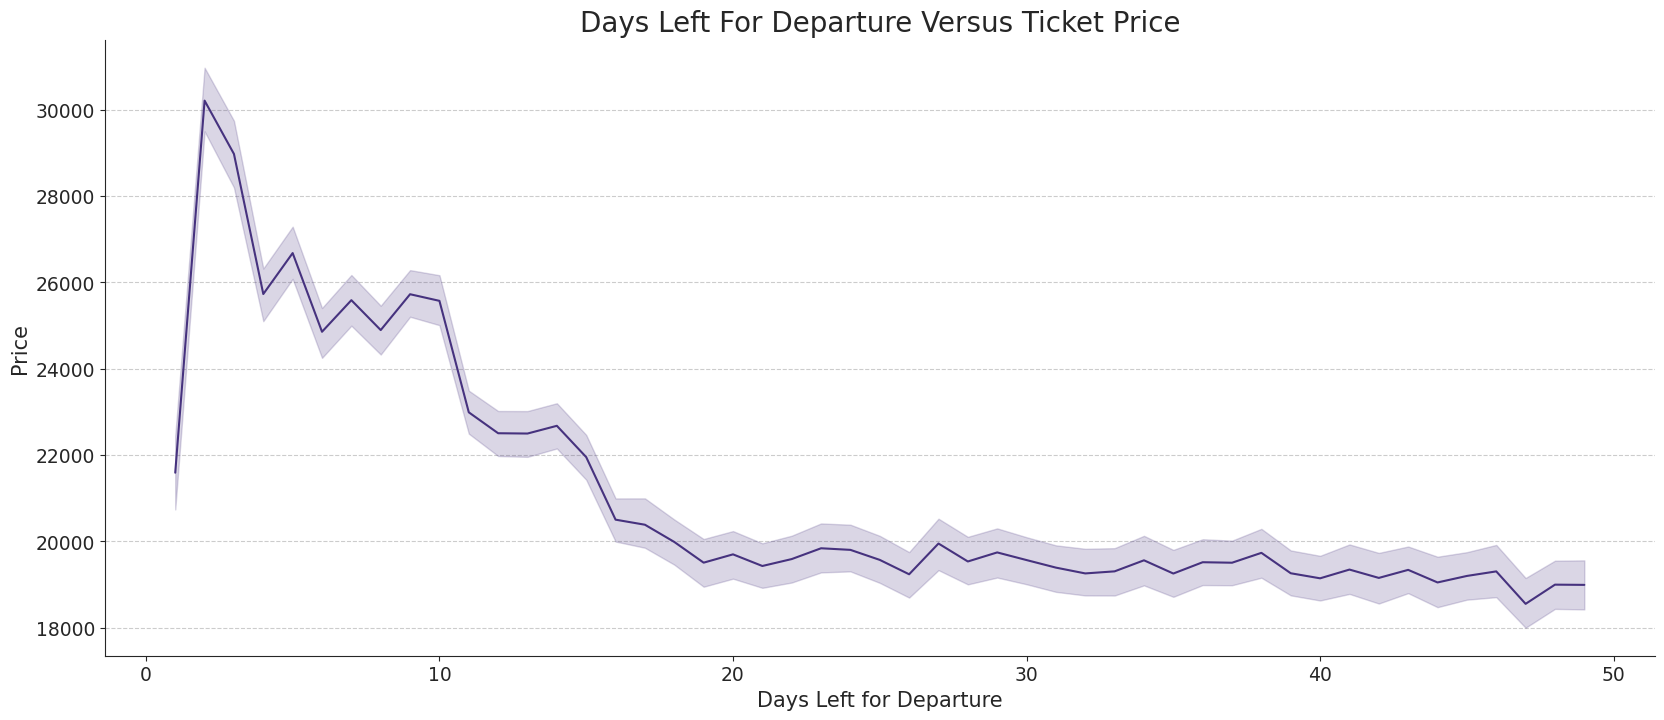

In [28]:
# Tạo một đồ thị đường sử dụng thư viện Seaborn để thể hiện mối quan hệ giữa số ngày còn lại trước khi xuất phát và giá vé
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=flights, x='days_left', y='price', ax=ax)

# Cài đặt tiêu đề và nhãn trục
ax.set_title('Days Left For Departure Versus Ticket Price', fontsize=20)
ax.set_xlabel('Days Left for Departure', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Cài đặt kích thước chữ cho các nhãn trục
ax.tick_params(axis='both', which='major', labelsize=13.5)

# Hiển thị lưới đứt
ax.grid(axis='y', linestyle='--')

# Loại bỏ đường viền trên và bên phải của đồ thị
sns.despine()

# Hiển thị đồ thị
plt.show()


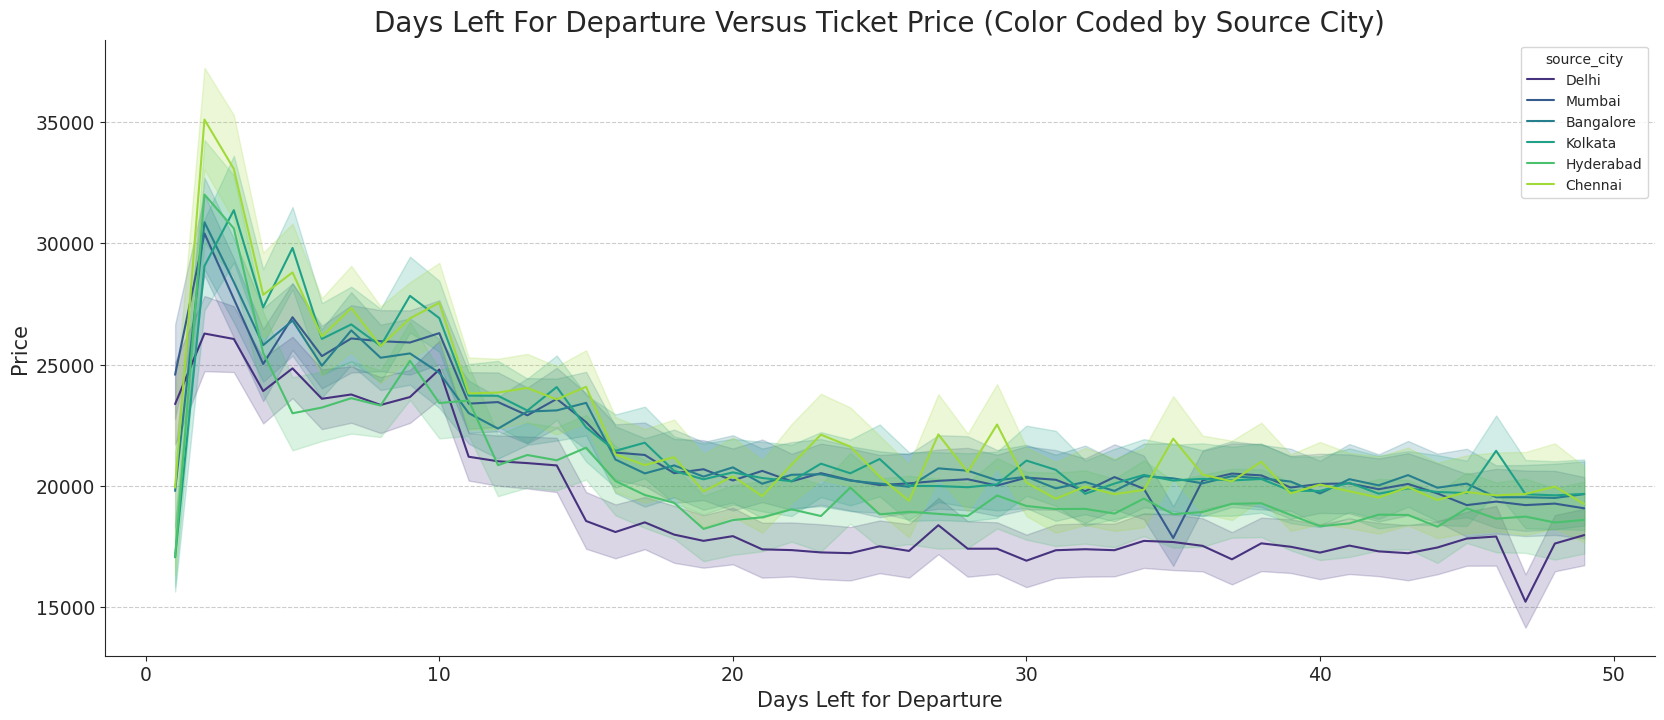

In [29]:
# Tạo một đồ thị đường sử dụng thư viện Seaborn để thể hiện mối quan hệ giữa số ngày còn lại trước khi xuất phát và giá vé,
# với sự phân biệt màu sắc dựa trên thành phố nguồn (source_city)
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=flights, x='days_left', y='price', hue='source_city', ax=ax)

# Cài đặt tiêu đề và nhãn trục
ax.set_title('Days Left For Departure Versus Ticket Price (Color Coded by Source City)', fontsize=20)
ax.set_xlabel('Days Left for Departure', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Cài đặt kích thước chữ cho các nhãn trục
ax.tick_params(axis='both', which='major', labelsize=13.5)

# Hiển thị lưới đứt
ax.grid(axis='y', linestyle='--')

# Loại bỏ đường viền trên và bên phải của đồ thị
sns.despine()

# Hiển thị đồ thị
plt.show()


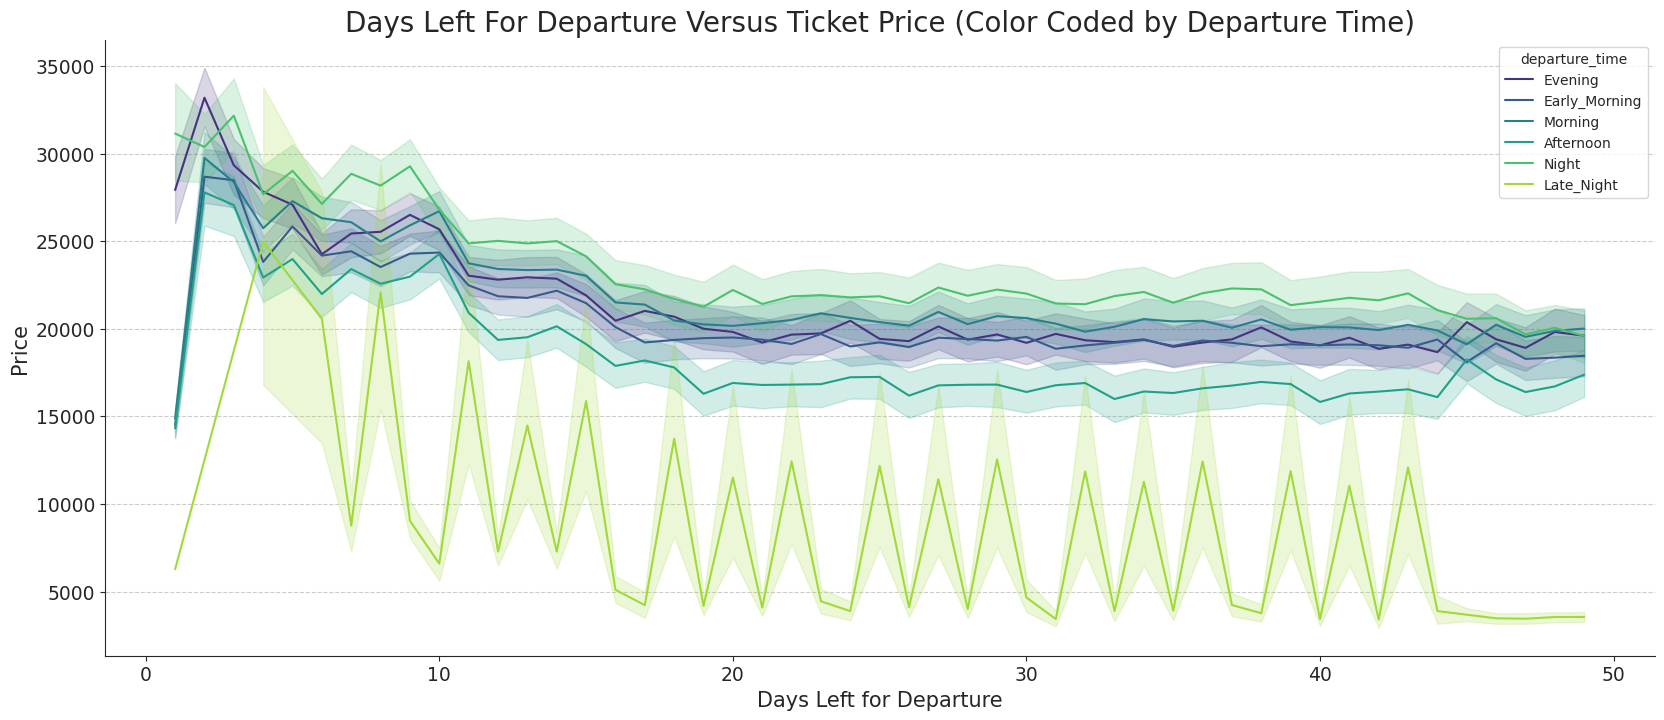

In [30]:
# Tạo một đồ thị đường sử dụng thư viện Seaborn để thể hiện mối quan hệ giữa số ngày còn lại trước khi xuất phát và giá vé,
# với sự phân biệt màu sắc dựa trên thời gian xuất phát (departure_time)
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=flights, x='days_left', y='price', hue='departure_time', ax=ax)

# Cài đặt tiêu đề và nhãn trục
ax.set_title('Days Left For Departure Versus Ticket Price (Color Coded by Departure Time)', fontsize=20)
ax.set_xlabel('Days Left for Departure', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Cài đặt kích thước chữ cho các nhãn trục
ax.tick_params(axis='both', which='major', labelsize=13.5)

# Hiển thị lưới đứt
ax.grid(axis='y', linestyle='--')

# Loại bỏ đường viền trên và bên phải của đồ thị
sns.despine()

# Hiển thị đồ thị
plt.show()


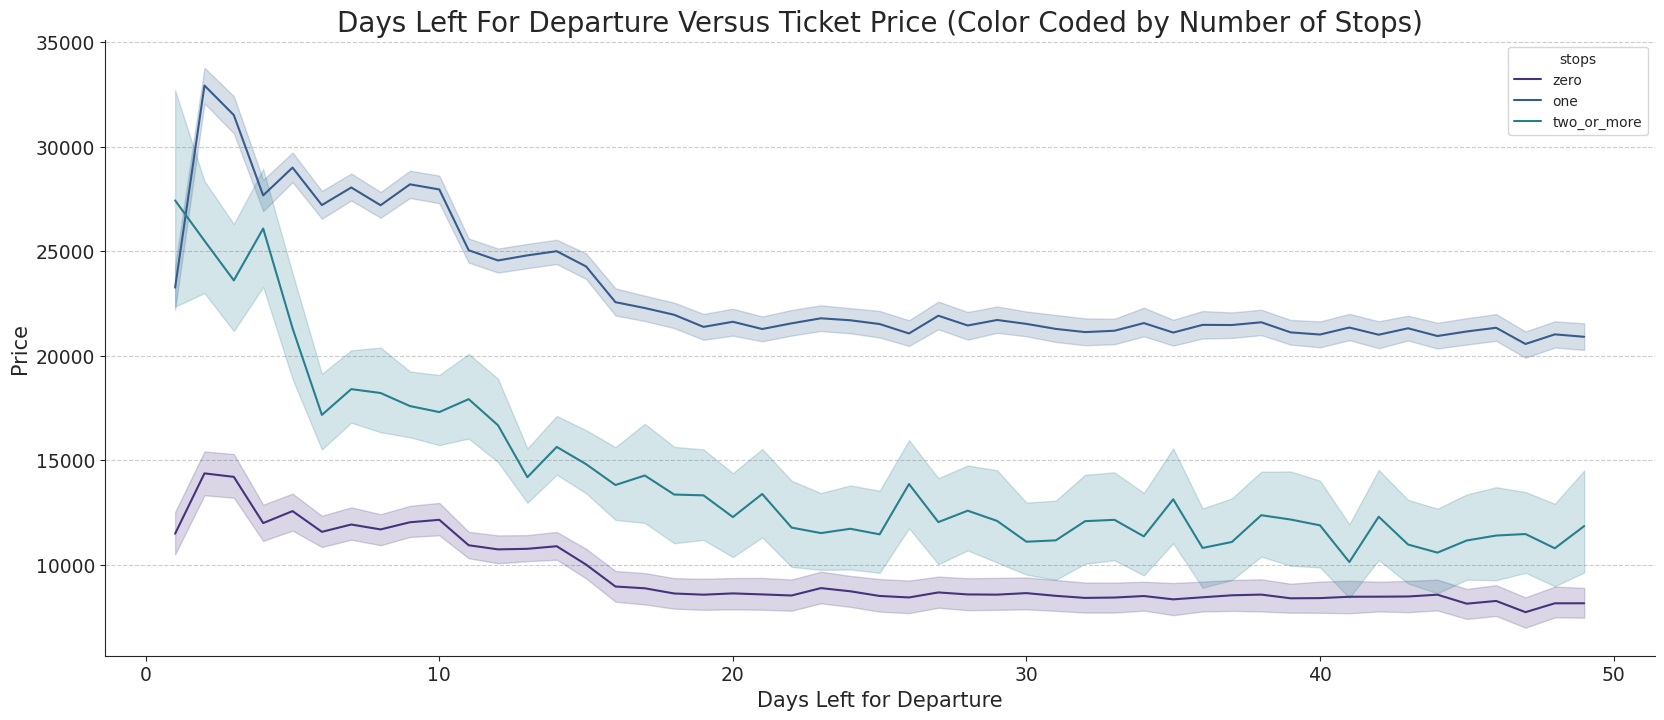

In [31]:
# Tạo một đồ thị đường sử dụng thư viện Seaborn để thể hiện mối quan hệ giữa số ngày còn lại trước khi xuất phát và giá vé,
# với sự phân biệt màu sắc dựa trên số lượng điểm dừng (stops)
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=flights, x='days_left', y='price', hue='stops', ax=ax)

# Cài đặt tiêu đề và nhãn trục
ax.set_title('Days Left For Departure Versus Ticket Price (Color Coded by Number of Stops)', fontsize=20)
ax.set_xlabel('Days Left for Departure', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Cài đặt kích thước chữ cho các nhãn trục
ax.tick_params(axis='both', which='major', labelsize=13.5)

# Hiển thị lưới đứt
ax.grid(axis='y', linestyle='--')

# Loại bỏ đường viền trên và bên phải của đồ thị
sns.despine()

# Hiển thị đồ thị
plt.show()


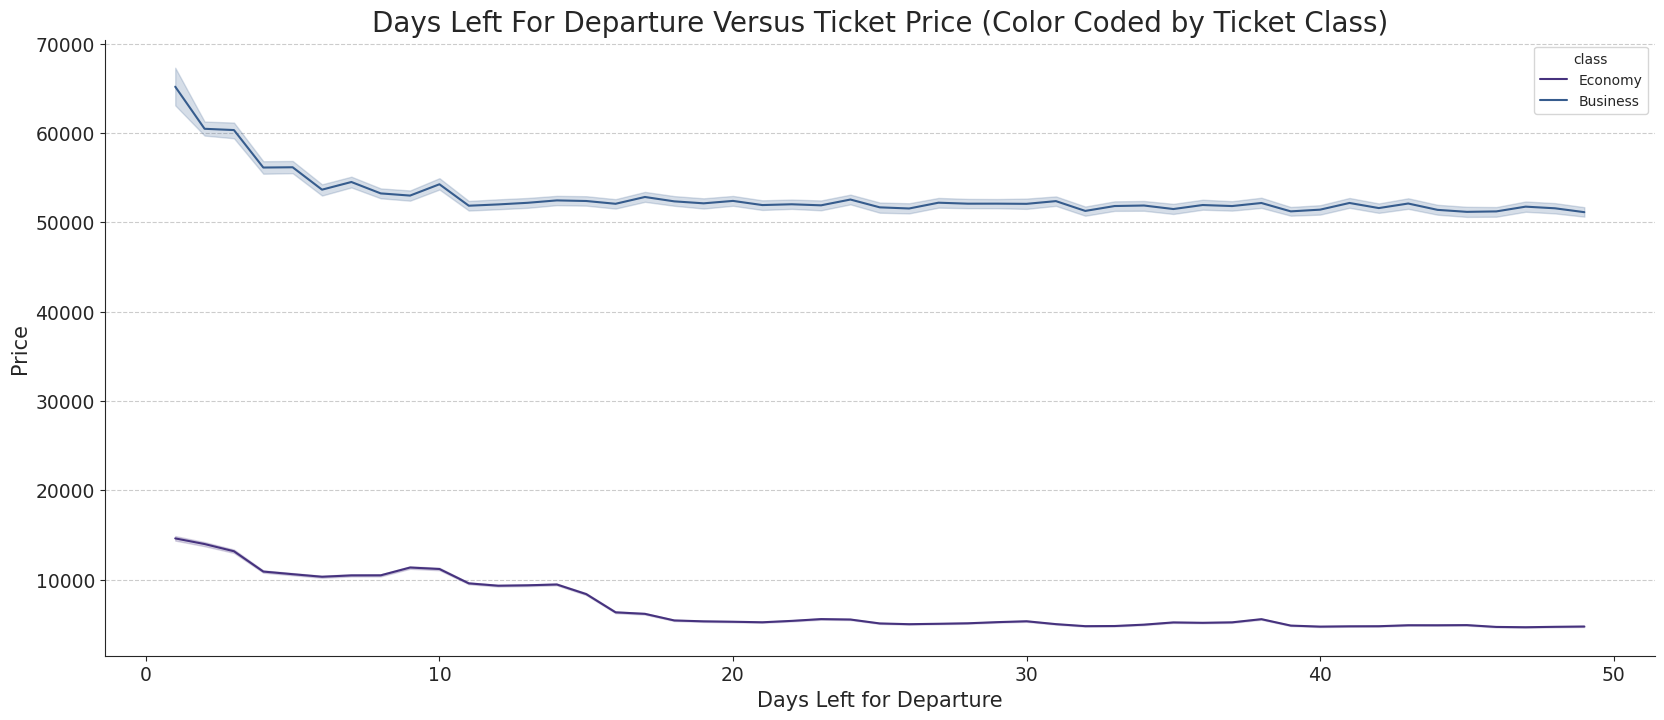

In [32]:
# Tạo một đồ thị đường sử dụng thư viện Seaborn để thể hiện mối quan hệ giữa số ngày còn lại trước khi xuất phát và giá vé,
# với sự phân biệt màu sắc dựa trên hạng vé (class)
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=flights, x='days_left', y='price', hue='class', ax=ax)

# Cài đặt tiêu đề và nhãn trục
ax.set_title('Days Left For Departure Versus Ticket Price (Color Coded by Ticket Class)', fontsize=20)
ax.set_xlabel('Days Left for Departure', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Cài đặt kích thước chữ cho các nhãn trục
ax.tick_params(axis='both', which='major', labelsize=13.5)

# Hiển thị lưới đứt
ax.grid(axis='y', linestyle='--')

# Loại bỏ đường viền trên và bên phải của đồ thị
sns.despine()

# Hiển thị đồ thị
plt.show()


## **<font color='blue'>Thông tin chi tiết<font>**

1. <font color='white'>Giá vé máy bay cao nhất khi chỉ còn 1-3 ngày khởi hành nhưng giảm dần khi số ngày còn lại tăng lên.</font>

2. <font color='white'>Air India và Vistara là những hãng hàng không đắt nhất và giá giảm khi số ngày khởi hành tăng lên.</font>

3. <font color='white'>Giờ khởi hành đêm muộn có giá thấp hơn so với các giờ khởi hành khác, tuy nhiên giá đến vào đêm muộn cao hơn so với giờ đến vào buổi tối.</font>

4. <font color='white'>Giá tăng do nhiều yếu tố như hãng hàng không, thành phố xuất phát, giờ khởi hành, điểm dừng, thời gian đến, hạng ghế khi chỉ còn 1-2 ngày khởi hành nhưng giảm khi số ngày còn lại khởi hành tăng lên.</font>


---

## **<font color='white'>Tiền xử lý data<font>**

In [33]:
# Sử dụng MinMaxScaler từ thư viện scikit-learn để chuẩn hóa giá trị của cột 'duration' trong DataFrame flights
# Chuẩn hóa được thực hiện để đưa giá trị của cột 'duration' về khoảng [0, 1], giúp thuật toán học máy hoặc mô hình dự đoán hiệu quả hơn.
scaler = MinMaxScaler()

# Áp dụng phép chuẩn hóa lên cột 'duration' và lưu trữ giá trị đã chuẩn hóa trở lại DataFrame flights
flights['duration'] = scaler.fit_transform(flights[['duration']])


In [34]:
# Sử dụng LabelEncoder từ thư viện scikit-learn để chuyển đổi giá trị của các cột kiểu 'object' trong DataFrame flights thành số nguyên
# LabelEncoder thường được sử dụng để chuyển đổi các biến phân loại thành dạng số nguyên để có thể sử dụng cho các mô hình học máy.
le = LabelEncoder()

# Áp dụng LabelEncoder thông qua hàm lambda cho từng cột trong DataFrame flights nếu kiểu dữ liệu của cột đó là 'object'
# Lưu ý: Các cột kiểu 'object' thường chứa dữ liệu phân loại, ví dụ như chuỗi (string).
flights = flights.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)


In [35]:
  # Tạo dữ liệu đào tạo và kiểm thử bằng cách tách DataFrame flights thành các tập X (đặc trưng) và y (biến mục tiêu)
X = flights.drop(['price'], axis=1)  # X chứa tất cả các đặc trưng trừ cột 'price'
y = flights['price']  # y chứa cột 'price', là biến mục tiêu cần dự đoán

# Sử dụng hàm train_test_split từ thư viện scikit-learn để chia dữ liệu thành tập đào tạo và tập kiểm thử
# train_size=0.7 chỉ định rằng 70% dữ liệu sẽ được sử dụng cho tập đào tạo, và 30% còn lại cho tập kiểm thử
# random_state=42 đảm bảo việc chia dữ liệu này là ngẫu nhiên, nhưng kết quả sẽ không thay đổi với mỗi lần chạy.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [36]:
# Sử dụng MinMaxScaler từ thư viện scikit-learn để chuẩn hóa giá trị của các đặc trưng trong tập đào tạo (X_train) và tập kiểm thử (X_test)
scaler = MinMaxScaler()

# Áp dụng phép chuẩn hóa lên tập đào tạo và tập kiểm thử để đưa giá trị của các đặc trưng về khoảng [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

## **<font color='white'>Model Building<font>**

In [38]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [39]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelETR = ExtraTreesRegressor()
modelLO=linear_model.Lasso(alpha=0.1)


# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr,modelETR,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(X_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(X_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4623.409
Mean Squared Error (MSE): 49062056.15
Root Mean Squared Error (RMSE): 7004.431
R2_score: 0.904672
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.66 %
Adj R Square:  0.904669
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 907.397
Mean Squared Error (MSE): 8836607.575
Root Mean Squared Error (RMSE): 2972.643
R2_score: 0.98283
Root Mean Squared Log Error (RMSLE): 7.997
Mean Absolute Percentage Error (MAPE): 6.16 %
Adj R Square:  0.982829
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 893.798
Mean Squared Error (MSE): 5654774.195
Root Mean Squared Error (RMSE): 2377.977
R2_score: 0.989013
Root Mean Squared Log Error (RMSLE): 7.774
Mean Ab

In [40]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4623.408800,0.904669,7004.431180,43.663631,4.906206e+07,8.854298,0.904672
1,DecisionTreeRegressor(),907.396945,0.982829,2972.643197,6.163993,8.836608e+06,7.997207,0.982830
2,"(DecisionTreeRegressor(max_features=1.0, rando...",893.798116,0.989013,2377.976912,6.008956,5.654774e+06,7.774005,0.989013
3,"(ExtraTreeRegressor(random_state=1220953348), ...",944.963227,0.987263,2560.289553,6.424583,6.555083e+06,7.847876,0.987263
4,Lasso(alpha=0.1),4623.301220,0.904669,7004.425521,43.660725,4.906198e+07,8.854297,0.904672


In [41]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','ExtraTreesRegressor','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.989013,893.798116,2377.976912,6.008956,5.654774e+06,7.774005,0.989013
1,ExtraTreesRegressor,0.987263,944.963227,2560.289553,6.424583,6.555083e+06,7.847876,0.987263
2,DecisionTreeRegressor,0.982829,907.396945,2972.643197,6.163993,8.836608e+06,7.997207,0.982830
3,LinearRegression,0.904669,4623.408800,7004.431180,43.663631,4.906206e+07,8.854298,0.904672
4,Lasso Regression,0.904669,4623.301220,7004.425521,43.660725,4.906198e+07,8.854297,0.904672


MAE cung cấp một cách đo lường tổng quát về mức độ lỗi trung bình của mô hình. Giá trị MAE càng thấp, mô hình càng chính xác vì nó có xu hướng dự đoán giá trị gần giống với giá trị thực tế.

In [42]:
# Tạo biểu đồ cột sử dụng thư viện Plotly Express để thể hiện so sánh giữa các mô hình theo độ đo Mean Absolute Error (MAE)
fig = px.bar(result, x='Model_Name', y='Mean_Absolute_Error_MAE', color='Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Model Name VS MAE', xaxis_title='Model Name', yaxis_title='Mean Absolute Error (MAE)')

# Hiển thị biểu đồ
fig.show()


In [43]:
fig = px.bar(result, x = 'Model_Name', y = 'Root_Mean_Squared_Error_RMSE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS RMSE', xaxis_title='Model_Name', yaxis_title='RMSE')
fig.show()

In [44]:
# Tạo biểu đồ cột sử dụng thư viện Plotly Express để thể hiện so sánh giữa các mô hình theo độ đo Mean Absolute Error (MAE)
fig = px.bar(result, x='Model_Name', y='Adj_R_Square', color='Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Model Name VS MAE', xaxis_title='Model Name', yaxis_title='Mean Absolute Error (MAE)')

# Hiển thị biểu đồ
fig.show()


In [45]:
# Tạo biểu đồ cột sử dụng thư viện Plotly Express để thể hiện so sánh giữa các mô hình theo độ đo Mean Absolute Error (MAE)
fig = px.bar(result, x='Model_Name', y='R2_score', color='Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)

# Cập nhật tiêu đề và nhãn trục cho biểu đồ
fig.update_layout(title_text='Model Name VS MAE', xaxis_title='Model Name', yaxis_title='Mean Absolute Error (MAE)')

# Hiển thị biểu đồ
fig.show()


#From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are
1. RandomForestRegressor
2. ExtraTreesRegressor
3. DecisionTreeRegressor

Training the Data with KNeighborsRegressor


In [56]:
#Trainig the model with
modelrfr.fit(X_train, y_train)

# Predict the model with test data

y_pred = modelrfr.predict(X_test)

In [57]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=flights_bk.merge(out,left_index=True,right_index=True)

In [58]:
result.sample(100)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
92101,Indigo,6E-2053,Bangalore,Night,zero,Late_Night,Delhi,Economy,2.92,40,4500,4500,4500.000000
280514,Vistara,UK-874,Hyderabad,Morning,one,Early_Morning,Bangalore,Business,23.33,7,38099,38099,40607.350000
241190,Vistara,UK-988,Mumbai,Night,one,Evening,Hyderabad,Business,20.08,45,58125,58125,62537.800000
12820,Indigo,6E-2028,Delhi,Afternoon,zero,Evening,Bangalore,Economy,3.00,16,4500,4500,5153.780000
283532,Vistara,UK-874,Hyderabad,Morning,one,Evening,Kolkata,Business,9.58,13,97381,97381,83366.813333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95168,GO_FIRST,G8-118,Bangalore,Night,one,Afternoon,Mumbai,Economy,14.92,9,5177,5177,6440.230000
164748,Air_India,AI-840,Hyderabad,Night,one,Evening,Mumbai,Economy,19.58,43,7738,7738,6941.990000
56085,Indigo,6E-7292,Mumbai,Afternoon,one,Night,Bangalore,Economy,6.33,20,6017,6017,6865.220000
275595,Vistara,UK-874,Hyderabad,Morning,one,Evening,Delhi,Business,11.25,18,47395,47395,50695.640000


In [59]:
# Thêm cột price_diff vào DataFrame
result['price_diff'] = abs(result['Price_actual'] - result['Price_pred'])

# In ra một số hàng để kiểm tra
result.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred,price_diff
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5953,7788.91,1835.91
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5955,8906.97,2951.97
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,6060,7507.72,1447.72
10,GO_FIRST,G8-392,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954,5954,6483.32,529.32
11,GO_FIRST,G8-338,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5954,5954,6479.15,525.15


In [61]:
result.describe()

,duration,days_left,price,Price_actual,Price_pred,price_diff
count,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000
mean,12.242090,25.946649,20874.981410,20874.981410,20918.274128,893.676312
std,7.200407,13.543974,22686.388372,22686.388372,22599.764171,2201.934709
min,0.830000,1.000000,1105.000000,1105.000000,1105.000000,0.000000
25%,6.830000,14.000000,4784.000000,4784.000000,4896.000000,2.300000
50%,11.250000,26.000000,7425.000000,7425.000000,7488.010000,120.485000
75%,16.170000,38.000000,42521.000000,42521.000000,42600.520000,651.250000
max,47.750000,49.000000,115211.000000,115211.000000,108914.680000,41672.150000


In [60]:
selection =RandomForestRegressor()
selection.fit(X,y)
selection.feature_importances_

array([0.0010076 , 0.02891014, 0.00691491, 0.00248072, 0.0019359 ,
       0.00284645, 0.00990698, 0.87965176, 0.04833738, 0.01800817])

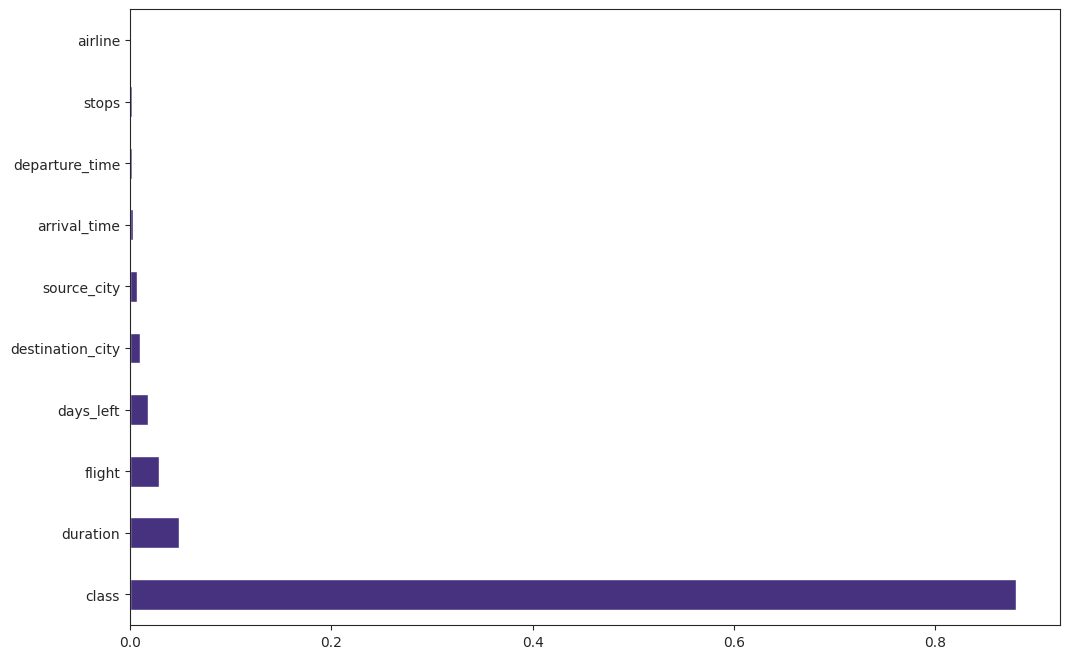

In [62]:
# plotting graph of important features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

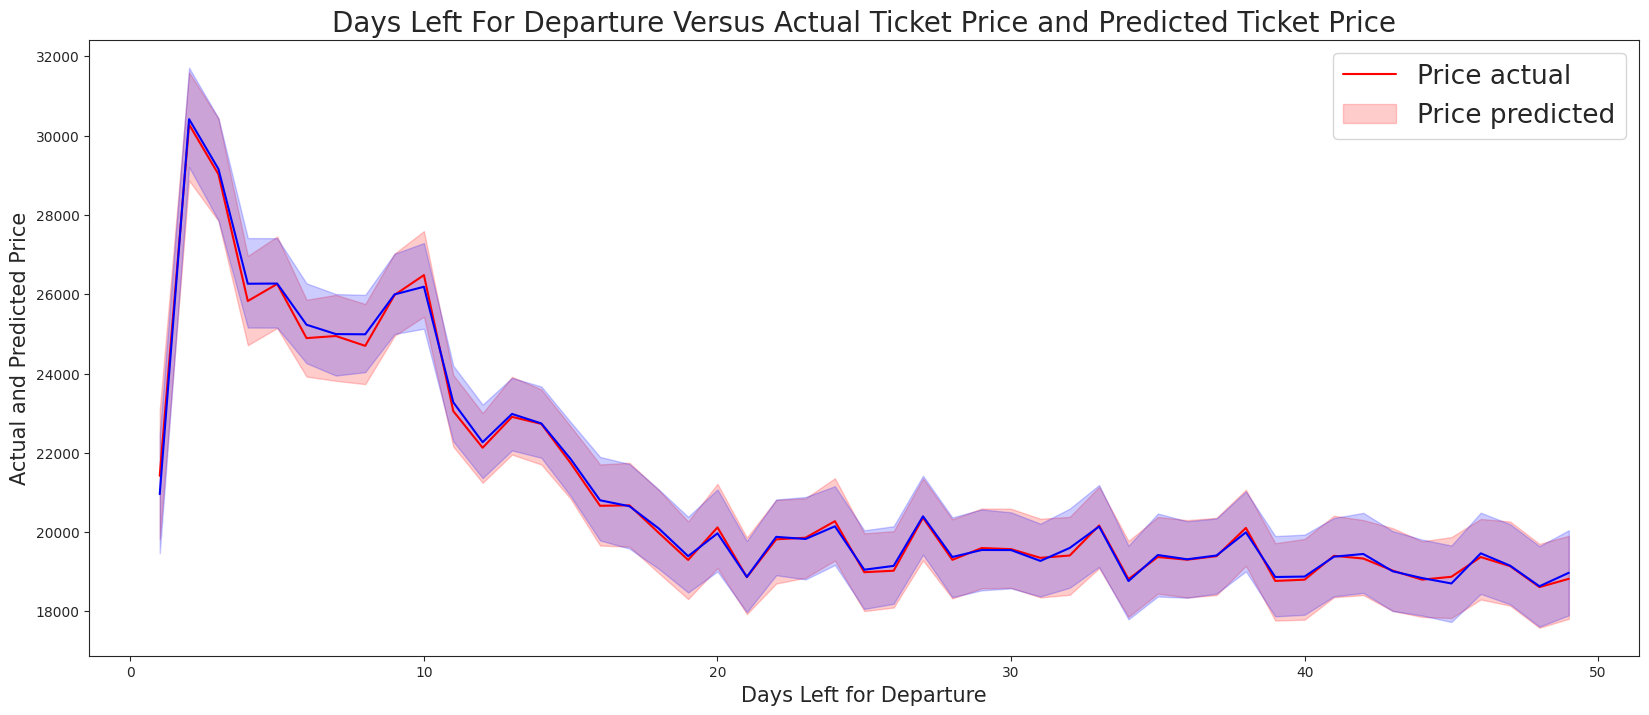

In [63]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

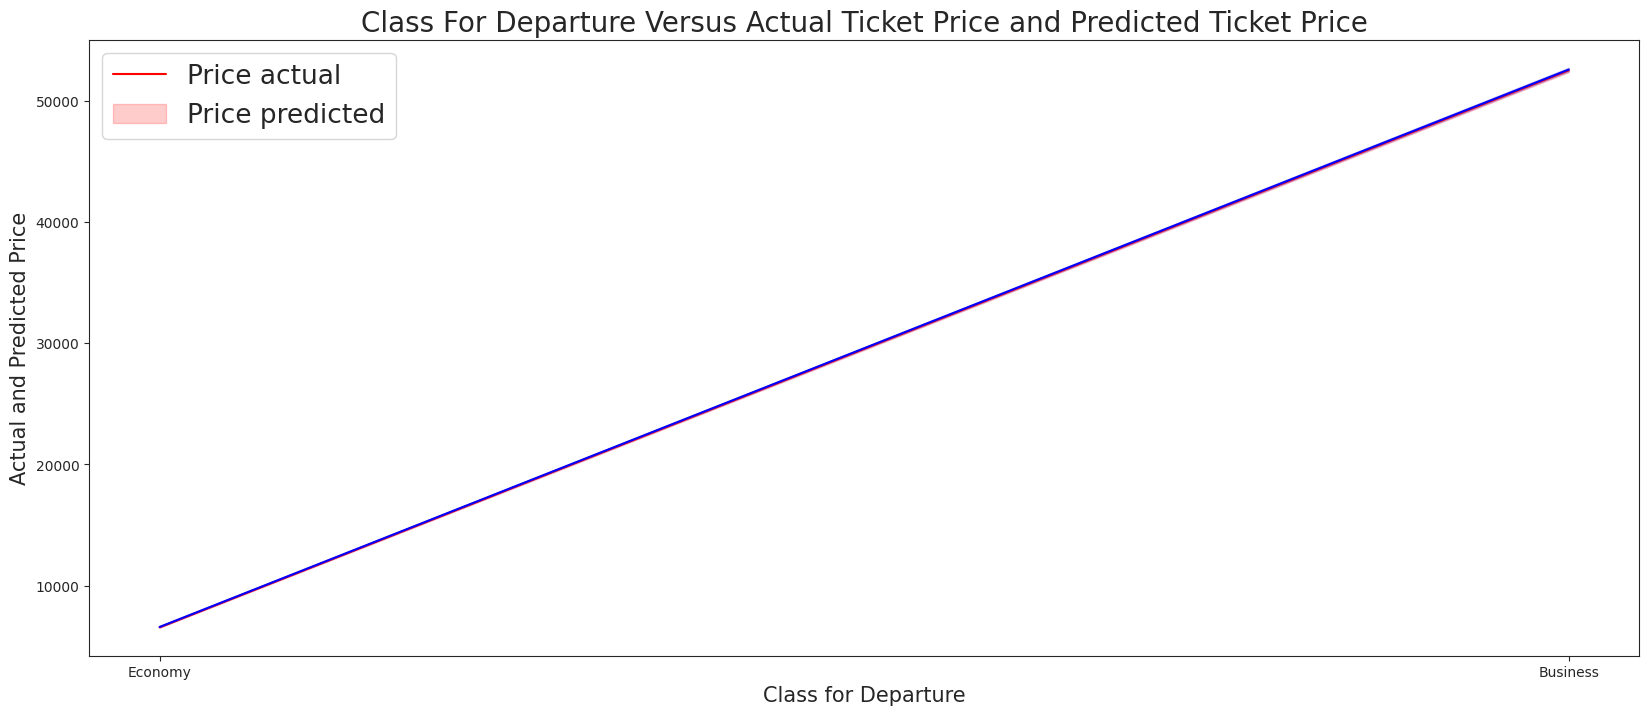

In [66]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='class',y='Price_actual',color='red')
sns.lineplot(data=result,x='class',y='Price_pred',color='blue')
plt.title('Class For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Class for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

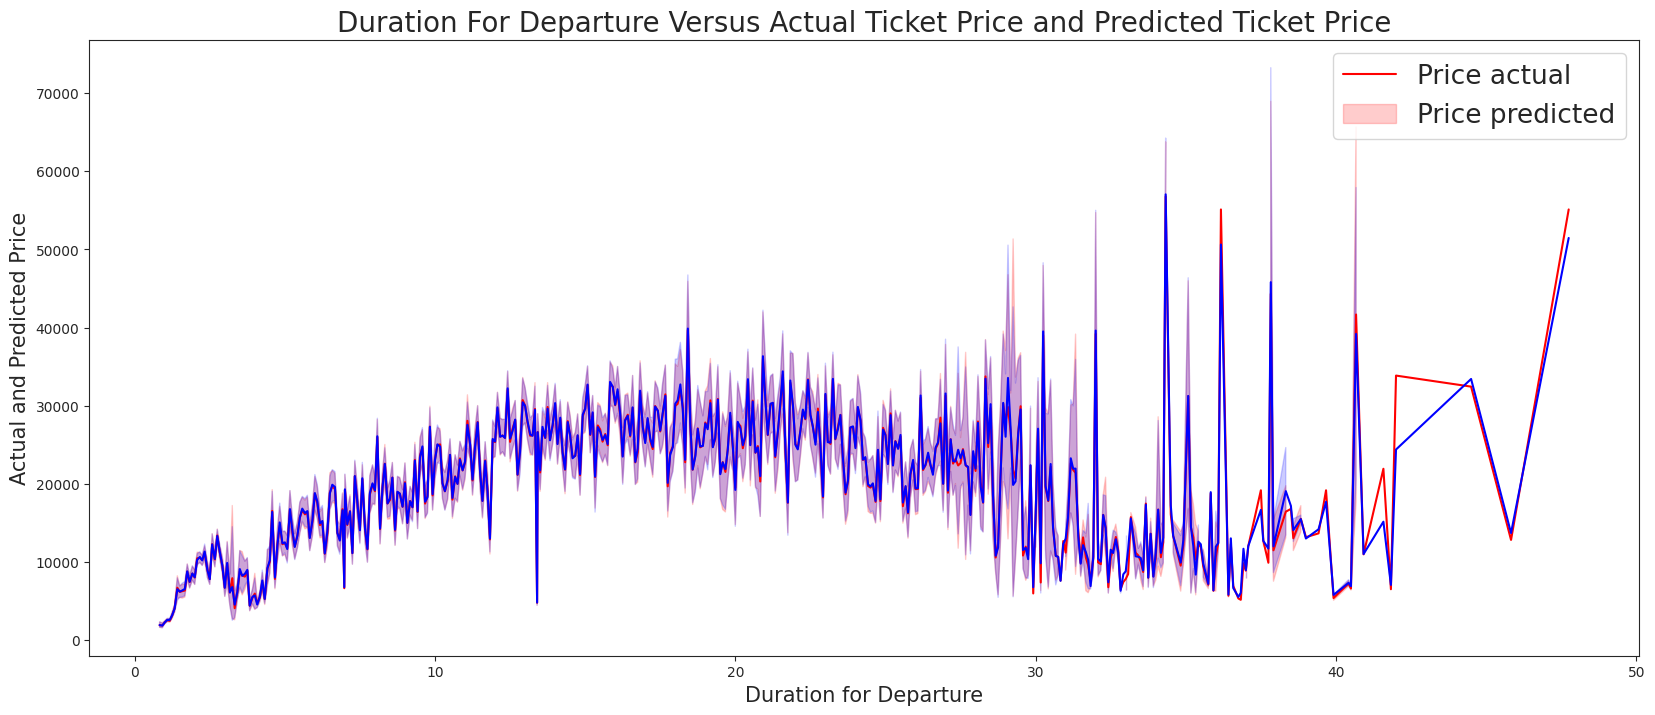

In [67]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='duration',y='Price_actual',color='red')
sns.lineplot(data=result,x='duration',y='Price_pred',color='blue')
plt.title('Duration For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Duration for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

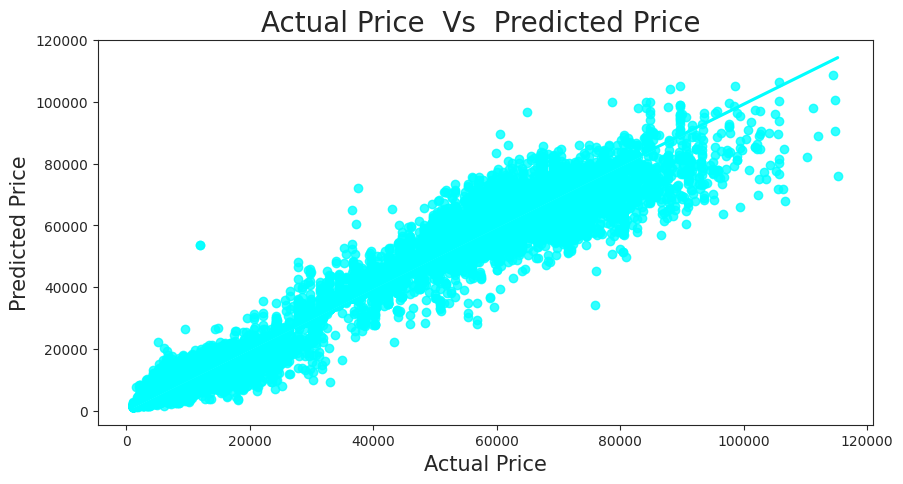

In [64]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()